In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_confusion_matrix

from collections import defaultdict

# Data Preparation

In [2]:
df = pd.read_csv('/Users/samuele/University/2.DM2/fma_metadata/echo_outlierfree.csv')
df.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,tempo,duration,bit_rate,genre_top
0,145,0.235506,0.438672,0.487752,0.716122,0.070359,0.047298,0.650452,120.790,326,256,Jazz
1,146,0.532019,0.417681,0.476422,0.402500,0.172105,0.035361,0.682397,135.468,354,256,Jazz
2,147,0.778410,0.706681,0.866116,0.806703,0.104650,0.065083,0.917613,120.218,232,256,Jazz
3,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,0.034018,90.241,405,256,Rock
4,154,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,0.035632,53.758,319,256,Rock


In [3]:
df.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,tempo,duration,bit_rate,genre_top
0,145,0.235506,0.438672,0.487752,0.716122,0.070359,0.047298,0.650452,120.790,326,256,Jazz
1,146,0.532019,0.417681,0.476422,0.402500,0.172105,0.035361,0.682397,135.468,354,256,Jazz
2,147,0.778410,0.706681,0.866116,0.806703,0.104650,0.065083,0.917613,120.218,232,256,Jazz
3,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,0.034018,90.241,405,256,Rock
4,154,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,0.035632,53.758,319,256,Rock


# Data Partitioning

In [4]:
attributes = [col for col in df.columns if col != 'genre_top']

train, test = train_test_split(df, test_size=.33, random_state=42)

X_test = df[attributes]
y_test = df['genre_top']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [5]:
# encoding labels
le = preprocessing.LabelEncoder()
y_test_enc = ~le.fit_transform(test['genre_top']).astype('bool')
y_test_enc

array([False, False, False, ..., False, False, False])

In [6]:
df['genre_top'].value_counts()

Rock    3729
Jazz     217
Name: genre_top, dtype: int64

# RIPPER

https://github.com/imoscovitz/wittgenstein

In [8]:
import wittgenstein as lw

In [22]:
for pr in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]: 
        clf = lw.RIPPER(random_state=42, prune_size=pr)
        clf.fit(train, class_feat='genre_top', pos_class='Jazz')
        y_predicted = clf.predict(test)
        print(ks, "\nprune_size: ", pr)
        print(classification_report(y_test_enc, y_predicted))

k:  5 
prune_size:  0.1
              precision    recall  f1-score   support

       False       0.96      0.98      0.97      1234
        True       0.36      0.20      0.26        69

    accuracy                           0.94      1303
   macro avg       0.66      0.59      0.61      1303
weighted avg       0.92      0.94      0.93      1303

k:  5 
prune_size:  0.2
              precision    recall  f1-score   support

       False       0.96      0.99      0.97      1234
        True       0.53      0.29      0.37        69

    accuracy                           0.95      1303
   macro avg       0.74      0.64      0.67      1303
weighted avg       0.94      0.95      0.94      1303

k:  5 
prune_size:  0.3
              precision    recall  f1-score   support

       False       0.95      0.99      0.97      1234
        True       0.50      0.16      0.24        69

    accuracy                           0.95      1303
   macro avg       0.73      0.58      0.61      1303
we

ripper.py: .fit | base.py: ._check_allpos_allneg: RuntimeWarning: 
Ruleset is empty. All predictions it makes with method .predict will be negative. It may be untrained or was trained on a dataset split lacking positive examples.

base.py: .predict | base.py: ._check_allpos_allneg: RuntimeWarning: 
Ruleset is empty. All predictions it makes with method .predict will be negative. It may be untrained or was trained on a dataset split lacking positive examples.

/Users/samuele/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samuele/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

In [23]:
clf = lw.RIPPER(random_state=42, prune_size=0.2)
clf.fit(train, class_feat='genre_top', pos_class='Jazz')

In [24]:
y_predicted = clf.predict(test)
print(classification_report(y_test_enc, y_predicted))

              precision    recall  f1-score   support

       False       0.96      0.99      0.97      1234
        True       0.53      0.29      0.37        69

    accuracy                           0.95      1303
   macro avg       0.74      0.64      0.67      1303
weighted avg       0.94      0.95      0.94      1303



In [25]:
clf.out_model()

[[energy=0.0-0.25 ^ bit_rate=256-320 ^ acousticness=0.97-1.0 ^ track_id=33459-42428] V
[energy=0.0-0.25 ^ duration=309-394 ^ valence=0.07-0.15] V
[energy=0.0-0.25 ^ danceability=0.29-0.34 ^ bit_rate=256-320 ^ acousticness=0.97-1.0] V
[energy=0.0-0.25 ^ instrumentalness=0.89-0.91 ^ acousticness=0.85-0.92] V
[track_id=23072-33459 ^ tempo=29.09-85.84 ^ duration=309-394] V
[track_id=23072-33459 ^ tempo=29.09-85.84 ^ liveness=0.14-0.18] V
[energy=0.0-0.25 ^ acousticness=0.92-0.97 ^ duration=394-1052] V
[energy=0.0-0.25 ^ acousticness=0.92-0.97 ^ track_id=50291-71490] V
[duration=394-1052 ^ liveness=0.03-0.08] V
[bit_rate=256-320 ^ acousticness=0.97-1.0 ^ track_id=9174-16699] V
[bit_rate=256-320 ^ track_id=16699-23072 ^ liveness=0.1-0.11] V
[energy=0.0-0.25 ^ track_id=9174-16699 ^ bit_rate=163-192] V
[valence=0.68-0.81 ^ duration=309-394 ^ speechiness=0.03-0.04] V
[speechiness=0.07-0.1 ^ energy=0.25-0.39 ^ liveness=0.08-0.1]]


base.py: .predict_proba: RuntimeWarning: 
Some examples lacked any rule with sufficient sample size to predict_proba: [1, 1328, 2095, 2129, 2130, 2141, 2323, 2512, 2514, 2516, 2683, 2684, 2685, 2686, 2687, 2688, 2689, 2766, 3053, 3428]
 Consider running recalibrate_proba with smaller param min_samples, or set require_min_samples=False



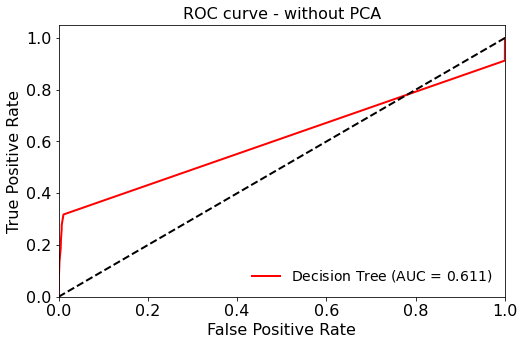

In [26]:
plt.figure(figsize=(8,5))

# y_score0 --> scores of decision tree without PCA
# fpr0, tpr0 ---> false positive and true positive of decision tree without PCA
y_score0 = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score0[:, 1], pos_label='Jazz')

# roc_auc0 --> ROC/AUC of decision tree without PCA
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='red', lw=2, label='Decision Tree$\;$(AUC = %.3f)' % roc_auc0)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve - without PCA', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Legend:
True: Jazz
False: Rock
[[1216   18]
 [  49   20]]


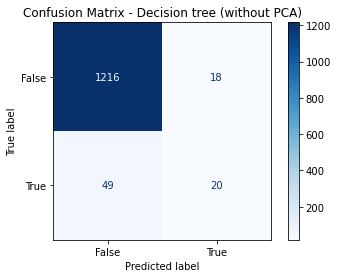

In [28]:
print("Legend:\nTrue: Jazz"
      "\nFalse: Rock")
cm = plot_confusion_matrix(clf,test,y_test_enc,
                            cmap = plt.cm.Blues)
cm.ax_.set_title('Confusion Matrix - Decision tree (without PCA)')
print(cm.confusion_matrix)
plt.show()